
### Time series data were behave according the situation, where they can play its role. Based on that its characteristics may vary.


1. Visualize the given data and try to interpret something from data according our experience.
2. We need to check the time series data is stationary or not?
3. If the given data is stationary, we can go for forecasting directly by using available models and methods.


## In this session, we will read time series data using Pandas, understand the stationarity of the data





### importing required libraries

In [ ]:
import os
import numpy                      as np
import pandas                     as pd
import matplotlib.pyplot          as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal     import seasonal_decompose, STL

# Reading time series

## Example 1

In [ ]:
##conda activate py3
##This will now tie conda to that environment:

import sys
sys.path

##os.path.isfile('F:\26_October_2022\GL-M.Tech.-TSF/Session-1-Ex/AirPassenger.csv')

##df1 = pd.read_csv('http://localhost:8889/tree/Session-1-Ex/AirPassenger.csv')
 ##df1 = pd.read_csv('AirPassenger.csv')

#os.path.isfile('F:\26_October_2022\GL-M.Tech.-TSF/datasets-master/articles/a5_data.csv')

##df1 = pd.read_csv('http://localhost:8889/tree/datasets-master/articles/a5_data.csv')

##df1 = pd.read_csv('F:\\26_October_2022\\GL-M.Tech.-TSF\\datasets-master\\articles\\a5_data.csv')
df1 = pd.read_csv('F:\\26_October_2022\\GL-M.Tech.-TSF\\datasets-master\\articles\\a5_data.csv')


checking datatypes

In [ ]:
df1.dtypes

Time            object
GDP_pc         float64
Consumption    float64
GDP_GWR        float64
C_GWR          float64
dtype: object

Pandas unable to identify Year-Month column as a date object

Using 'parse_dates' input, pandas will be able to identify that the data is time series.

In [ ]:
df1 = pd.read_csv('F:\\26_October_2022\\GL-M.Tech.-TSF\\datasets-master\\articles\\a5_data.csv', parse_dates = ['Time'])

In [ ]:
df1.dtypes

Time            object
GDP_pc         float64
Consumption    float64
GDP_GWR        float64
C_GWR          float64
dtype: object

Now the time series reference is approprately identified.

It is recommended that we make our time series reference as the index

In [ ]:
df1 = pd.read_csv('F:\\26_October_2022\\GL-M.Tech.-TSF\\datasets-master\\articles\\a5_data.csv', parse_dates = ['Time'], index_col = 'Time')

In [ ]:
df1.head()

,GDP_pc,Consumption,GDP_GWR,C_GWR
Time,,,,
Jan-90,39331.60531,1165889.00,0.0000,0.0000
Apr-90,39351.83085,1181456.25,0.0005,0.0133
Jul-90,39239.09880,1199427.50,-0.0029,0.0151
Oct-90,38744.73420,1210407.75,-0.0127,0.0091
Jan-91,38444.83981,1216658.00,-0.0078,0.0052


In [ ]:
df1.describe()

,GDP_pc,Consumption,GDP_GWR,C_GWR
count,120.000000,1.200000e+02,120.000000,120.000000
mean,49884.288063,2.605744e+06,0.003680,0.011159
std,6486.018212,9.636440e+05,0.005746,0.005482
min,38444.839810,1.165889e+06,-0.024200,-0.020700
25%,44351.164417,1.693666e+06,0.001250,0.008275
50%,51633.413905,2.595799e+06,0.003900,0.012100
75%,54204.483208,3.371302e+06,0.006925,0.014125
max,61194.390320,4.447927e+06,0.015700,0.022000


Using time series reference as index, We can conveniently do slicing i.e. obtain data for a specific time period.

In [ ]:
df1['Jan-90':'Oct-19']
##df1.shape


,GDP_pc,Consumption,GDP_GWR,C_GWR
Time,,,,
Jan-90,39331.60531,1165889.00,0.0000,0.0000
Apr-90,39351.83085,1181456.25,0.0005,0.0133
Jul-90,39239.09880,1199427.50,-0.0029,0.0151
Oct-90,38744.73420,1210407.75,-0.0127,0.0091
Jan-91,38444.83981,1216658.00,-0.0078,0.0052
...,...,...,...,...
Oct-18,60084.95554,4281996.75,0.0019,0.0074
Jan-19,60461.40216,4306850.00,0.0062,0.0058
Apr-19,60621.39429,4371253.75,0.0026,0.0148


We can check values corresponding to a specific time point aswell

In [ ]:
df1.loc['Jan-18']

GDP_pc         5.941134e+04
Consumption    4.147893e+06
GDP_GWR        8.200000e-03
C_GWR          1.230000e-02
Name: Jan-18, dtype: float64

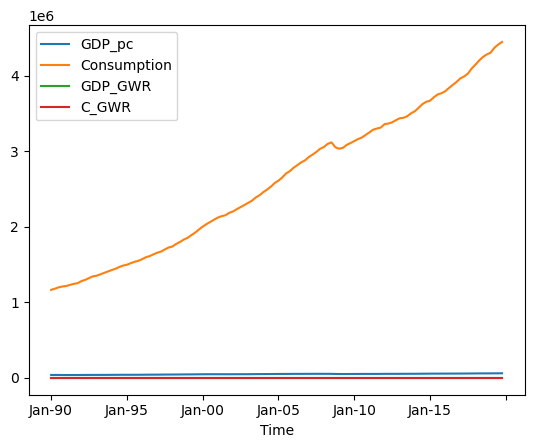

In [ ]:
# df1['GDP_pc'].plot()
# df1['GDP_GWR'].plot()
# df1['C_GWR'].plot()

df1.plot()



plt.show()

<Axes: xlabel='Time'>

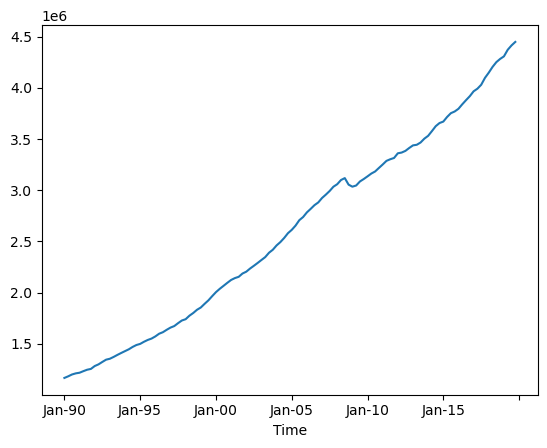

In [ ]:
df1['Consumption'].plot()

In [ ]:
l1=len(df1['Consumption'])
print(l1/3)
(np.sum(df1['Consumption']))/l1


40.0


2605744.4625

In [ ]:
first40=df1['Consumption'][0:40]
# print(first40)
first40.describe()

# second40=df1['Consumption'][41:80]
# # print(second40)
# second40.describe()

# third40=df1['Consumption'][81:120]
# # print(third40)
# third40.describe()


# second40=df1['Consumption'][((len(df1['Consumption'])/3)+1):(len(df1['Consumption'])/2)]
# print(second40)
# second40.describe()

# third40=df1['Consumption'][((len(df1['Consumption'])/2)+1):(len(df1['Consumption']))]
# print(third40)
# second40.describe()


count    4.000000e+01
mean     1.509012e+06
std      2.305782e+05
min      1.165889e+06
25%      1.315865e+06
50%      1.492757e+06
75%      1.679528e+06
max      1.964408e+06
Name: Consumption, dtype: float64

In [ ]:
second40=df1['Consumption'][41:80]
# print(second40)
second40.describe()

count    3.900000e+01
mean     2.612124e+06
std      3.651403e+05
min      2.036203e+06
25%      2.274948e+06
50%      2.612075e+06
75%      2.974033e+06
max      3.117692e+06
Name: Consumption, dtype: float64

In [ ]:
third40=df1['Consumption'][81:120]
# print(third40)
third40.describe()

count    3.900000e+01
mean     3.726088e+06
std      3.858099e+05
min      3.162101e+06
25%      3.397764e+06
50%      3.669782e+06
75%      4.010135e+06
max      4.447927e+06
Name: Consumption, dtype: float64

In [ ]:
first40=df1['GDP_pc'][0:40]
# print(first40)
first40.describe()



count       40.000000
mean     41983.285749
std       2826.403083
min      38444.839810
25%      39510.520365
50%      41548.481660
75%      44149.411113
max      48016.703020
Name: GDP_pc, dtype: float64

In [ ]:
second40=df1['GDP_pc'][41:80]
# print(second40)
second40.describe()


count       39.000000
mean     51452.720584
std       2081.131831
min      48522.585530
25%      49107.402205
50%      51667.833020
75%      53622.600250
max      54456.017590
Name: GDP_pc, dtype: float64

In [ ]:

third40=df1['GDP_pc'][81:120]
# print(third40)
third40.describe()

count       39.000000
mean     56406.351132
std       2662.455685
min      52597.123030
25%      53978.326705
50%      56571.111930
75%      58293.548600
max      61194.390320
Name: GDP_pc, dtype: float64

In [ ]:
first40=df1['GDP_GWR'][0:40]
# print(first40)
first40.describe()


count    40.000000
mean      0.004982
std       0.005540
min      -0.012700
25%       0.001450
50%       0.005550
75%       0.008475
max       0.013900
Name: GDP_GWR, dtype: float64

In [ ]:

second40=df1['GDP_GWR'][41:80]
# print(second40)
second40.describe()


count    39.000000
mean      0.002072
std       0.007325
min      -0.024200
25%      -0.000400
50%       0.003500
75%       0.006300
max       0.015700
Name: GDP_GWR, dtype: float64

In [ ]:


third40=df1['GDP_GWR'][81:120]
# print(third40)
third40.describe()

count    39.000000
mean      0.004067
std       0.003657
min      -0.004500
25%       0.002250
50%       0.004500
75%       0.006100
max       0.011800
Name: GDP_GWR, dtype: float64

<Axes: xlabel='Time'>

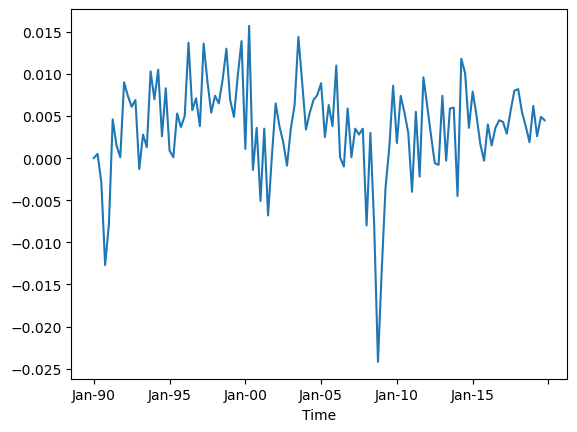

In [ ]:
df1['GDP_GWR'].plot()

In [ ]:
first40=df1['C_GWR'][0:40]
# print(first40)
first40.describe()

# second40=df1['C_GWR'][41:80]
# # print(second40)
# second40.describe()

# third40=df1['C_GWR'][81:120]
# # print(third40)
# third40.describe()

count    40.000000
mean      0.013045
std       0.004537
min       0.000000
25%       0.010800
50%       0.013200
75%       0.016000
max       0.022000
Name: C_GWR, dtype: float64

In [ ]:
second40=df1['C_GWR'][41:80]
# print(second40)
second40.describe()


count    39.000000
mean      0.011262
std       0.007035
min      -0.020700
25%       0.010200
50%       0.012600
75%       0.014500
max       0.019900
Name: C_GWR, dtype: float64

In [ ]:

third40=df1['C_GWR'][81:120]
# print(third40)
third40.describe()

count    39.000000
mean      0.008972
std       0.003561
min       0.001700
25%       0.006400
50%       0.009600
75%       0.011250
max       0.016700
Name: C_GWR, dtype: float64

<Axes: xlabel='Time'>

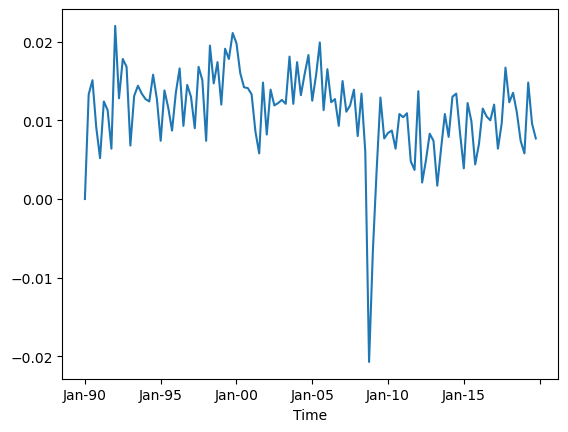

In [ ]:
df1['C_GWR'].plot()

<Axes: xlabel='Time'>

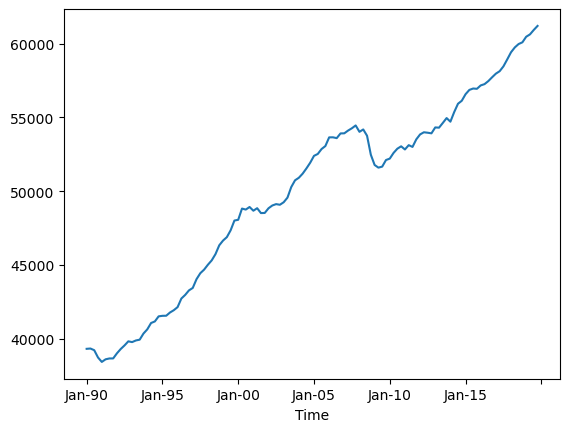

In [ ]:
df1['GDP_pc'].plot()

In [ ]:
second40=df1['Consumption'][41:80]
# print(second40)
second40.describe()

third40=df1['Consumption'][81:120]
# print(third40)
third40.describe()

## Example 2

In [ ]:
df2 = pd.read_csv('Gas.csv')

In [ ]:
df2.head()

,Unnamed: 0,x
0,1,1709
1,2,1646
2,3,1794
3,4,1878
4,5,2173


Lets drop unwanted columns and add time-stamp to series

In [ ]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df2.head()

,x
0,1709
1,1646
2,1794
3,1878
4,2173


In [ ]:
len(df2)

476

In [ ]:
date = pd.date_range(start='1/1/1956', end='1/1/1996', freq='M')
date

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=480, freq='M')

In [ ]:
df2['Time_Stamp'] = pd.DataFrame(date)

In [ ]:
df2.head()

,x,Time_Stamp
0,1709,1956-01-31
1,1646,1956-02-29
2,1794,1956-03-31
3,1878,1956-04-30
4,2173,1956-05-31


In [ ]:
df2=df2.set_index('Time_Stamp')

In [ ]:
df2.head()

,x
Time_Stamp,
1956-01-31,1709
1956-02-29,1646
1956-03-31,1794
1956-04-30,1878
1956-05-31,2173


<Axes: xlabel='Time_Stamp'>

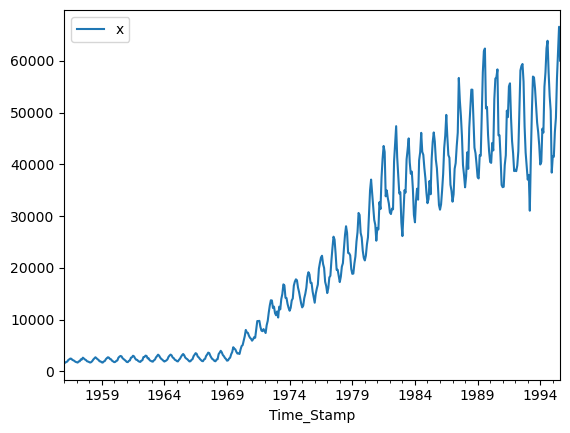

In [ ]:
df2.plot()

In [ ]:
l2=len(df2)
l2
round(l2/3)

159

In [ ]:
fg=df2[0:round(l2/3)]
# print(first40)
fg.describe()

,x
count,159.000000
mean,2392.811321
std,491.490953
min,1646.000000
25%,1994.000000
50%,2311.000000
75%,2685.000000
max,3957.000000


<Axes: xlabel='Time_Stamp'>

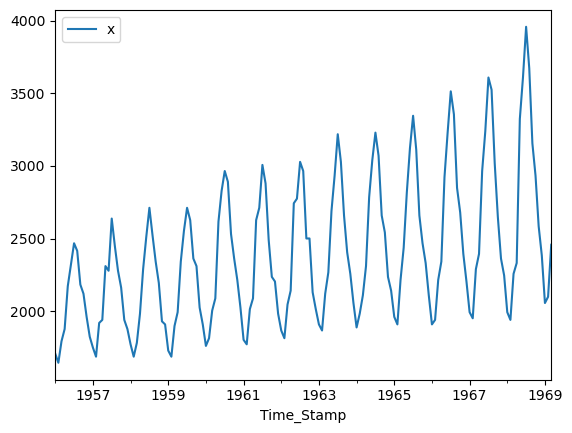

In [ ]:
fg.plot()

In [ ]:
sg=df2[round(l2/3): 2*round(l2/3)]
# print(sg)
sg.describe()

,x
count,159.000000
mean,18023.000000
std,9613.072453
min,2638.000000
25%,11306.500000
50%,16805.000000
75%,23811.000000
max,44133.000000


<Axes: xlabel='Time_Stamp'>

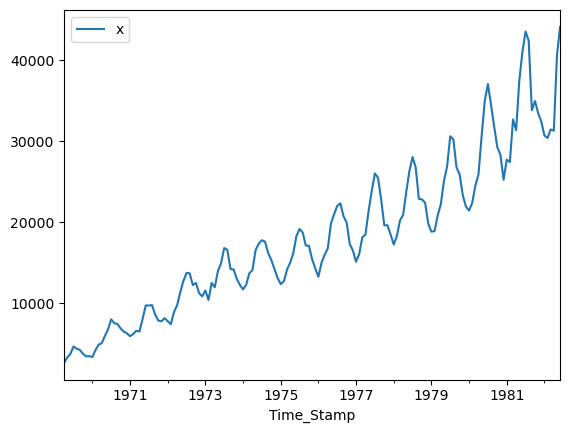

In [ ]:
sg.plot()

In [ ]:
tg=df2[2*round(l2/3): 3*round(l2/3)]
# print(tg)
tg.describe()

,x
count,158.000000
mean,43971.867089
std,8492.834481
min,26138.000000
25%,37999.500000
50%,42212.000000
75%,49525.250000
max,66600.000000


<Axes: xlabel='Time_Stamp'>

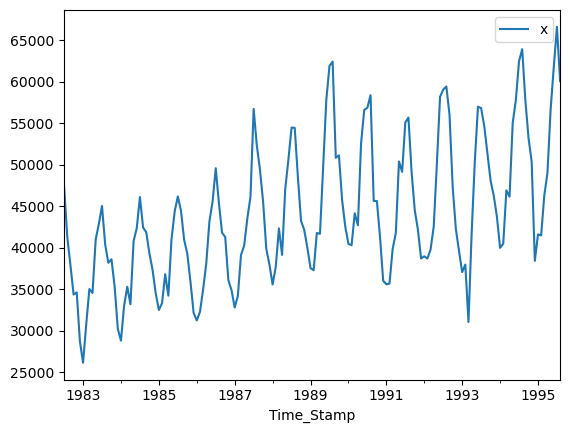

In [ ]:
tg.plot()

## Example 3

In [ ]:
df3= pd.read_csv('RetailTurnover.csv')

In [ ]:
df3.head()

,Year,Quarter,Turnover
0,1982,Q3,13423.2
1,1982,Q4,13128.8
2,1983,Q1,15398.8
3,1983,Q2,12964.2
4,1983,Q3,13133.5


In [ ]:
df3.describe()

,Turnover
count,39.000000
mean,14623.169231
std,1298.925539
min,12964.200000
25%,13555.600000
50%,14231.800000
75%,15156.550000
max,17361.600000


In [ ]:
df3.describe()

,Year,Turnover
count,39.000000,39.000000
mean,1986.871795,14623.169231
std,2.876214,1298.925539
min,1982.000000,12964.200000
25%,1984.500000,13555.600000
50%,1987.000000,14231.800000
75%,1989.000000,15156.550000
max,1992.000000,17361.600000


data is recorder for the period of 1982 through 1992 on quarterly basis

converting above data into time series

In [ ]:
quarters= pd.date_range(start='9/30/1982', end='3/31/1992', freq='Q')

In [ ]:
quarters

DatetimeIndex(['1982-09-30', '1982-12-31', '1983-03-31', '1983-06-30',
               '1983-09-30', '1983-12-31', '1984-03-31', '1984-06-30',
               '1984-09-30', '1984-12-31', '1985-03-31', '1985-06-30',
               '1985-09-30', '1985-12-31', '1986-03-31', '1986-06-30',
               '1986-09-30', '1986-12-31', '1987-03-31', '1987-06-30',
               '1987-09-30', '1987-12-31', '1988-03-31', '1988-06-30',
               '1988-09-30', '1988-12-31', '1989-03-31', '1989-06-30',
               '1989-09-30', '1989-12-31', '1990-03-31', '1990-06-30',
               '1990-09-30', '1990-12-31', '1991-03-31', '1991-06-30',
               '1991-09-30', '1991-12-31', '1992-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [ ]:
df3['Time_Stamp']=pd.DataFrame(quarters)

In [ ]:
df3.head()

,Year,Quarter,Turnover,Time_Stamp
0,1982,Q3,13423.2,1982-09-30
1,1982,Q4,13128.8,1982-12-31
2,1983,Q1,15398.8,1983-03-31
3,1983,Q2,12964.2,1983-06-30
4,1983,Q3,13133.5,1983-09-30


dropping unwanted columns and making time-stamp as index for the series

In [ ]:
df3.drop(['Year','Quarter'],axis=1,inplace=True)
df3=df3.set_index('Time_Stamp')

In [ ]:
df3.head()

,Turnover
Time_Stamp,
1982-09-30,13423.2
1982-12-31,13128.8
1983-03-31,15398.8
1983-06-30,12964.2
1983-09-30,13133.5


<Axes: xlabel='Time_Stamp'>

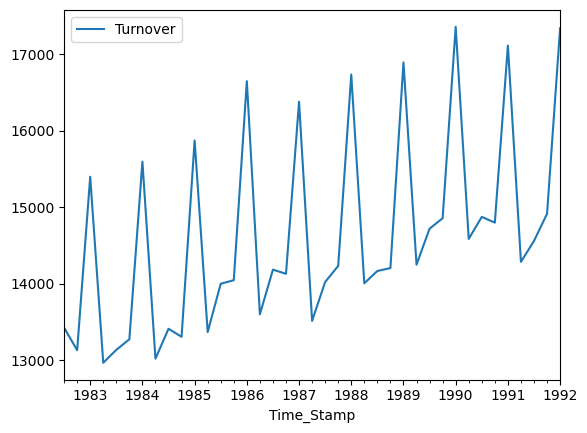

In [ ]:
df3.plot()

In [ ]:
l3=len(df3)
l3

39

In [ ]:
df3.describe()

,Turnover
count,39.000000
mean,14623.169231
std,1298.925539
min,12964.200000
25%,13555.600000
50%,14231.800000
75%,15156.550000
max,17361.600000


In [ ]:
frt=df3[0: round(l3/3)]
# print(frt)
frt.describe()



,Turnover
count,13.000000
mean,13837.461538
std,1053.462441
min,12964.200000
25%,13133.500000
50%,13366.500000
75%,13998.600000
max,15873.900000


<Axes: xlabel='Time_Stamp'>

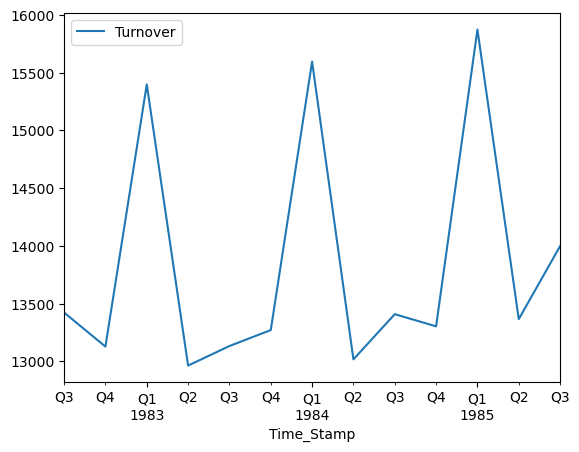

In [ ]:
frt.plot()

In [ ]:
s=df2[2*round(l2/3): 3*round(l2/3)]
# print(tg)
tg.describe()

In [ ]:
tg=df2[2*round(l2/3): 3*round(l2/3)]
# print(tg)
tg.describe()

## Multivariate Time Series

In [ ]:
df4= pd.read_csv('Daily_electricity_consumption.csv',)

# df4= pd.read_csv('Air.csv',)


In [ ]:
df4.head()

,date_time,active_power_consumed,meter_reading
0,01-01-2009,0.976869,1.946528
1,02-01-2009,1.616326,8.222917
2,03-01-2009,1.328817,7.249306
3,04-01-2009,1.347218,2.253472
4,05-01-2009,1.113889,6.006944


In [ ]:
date = pd.date_range(start='1/1/2009', end='11/26/2010', freq='D')
date

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', length=695, freq='D')

In [ ]:
df4['Time_Stamp'] = pd.DataFrame(date)

In [ ]:
df4=df4.set_index('Time_Stamp')

In [ ]:
df4=df4.drop('date_time',axis=1)

In [ ]:
df4.head()

,active_power_consumed,meter_reading
Time_Stamp,,
2009-01-01,0.976869,1.946528
2009-01-02,1.616326,8.222917
2009-01-03,1.328817,7.249306
2009-01-04,1.347218,2.253472
2009-01-05,1.113889,6.006944


## Plotting time series

### Plotting Air Passanger time series data

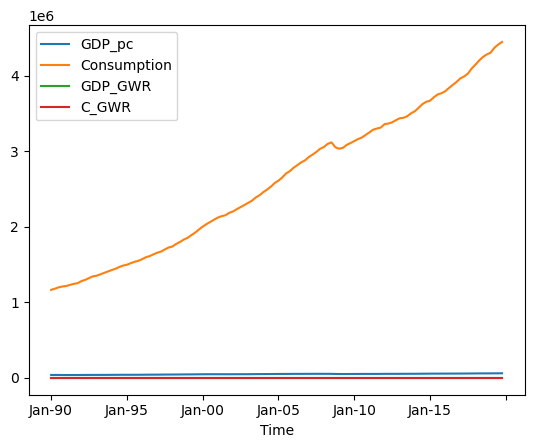

(120, 4)

In [ ]:
df1.plot()
plt.show()
df1.shape

We can increase the size of the plot

<Axes: xlabel='Time'>

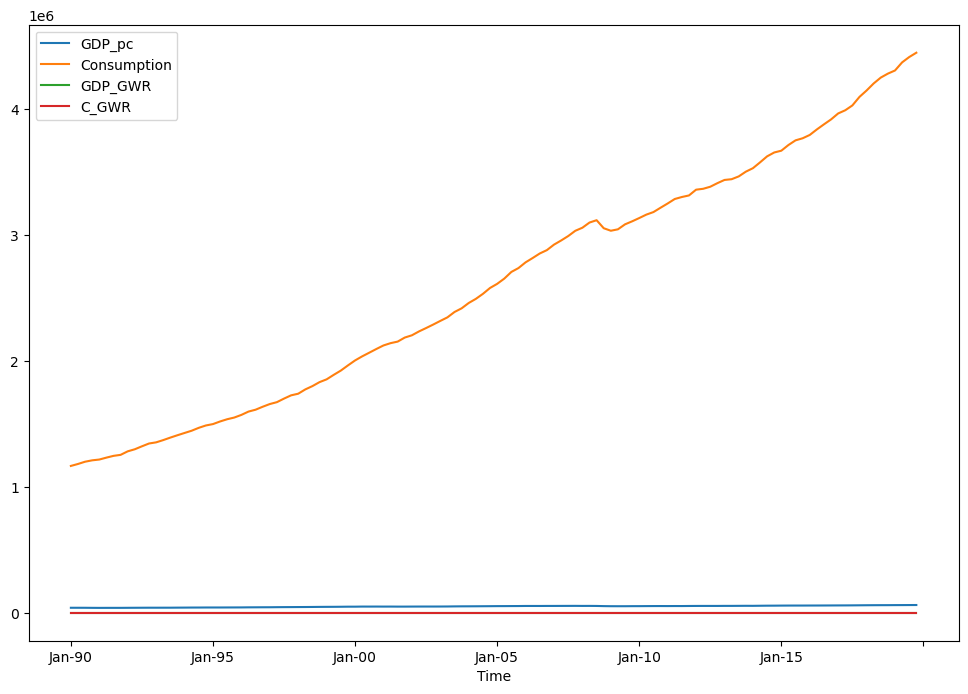

In [ ]:
df1.plot(figsize=(12,8))

we can include gridlines to the plot

<Axes: xlabel='Time'>

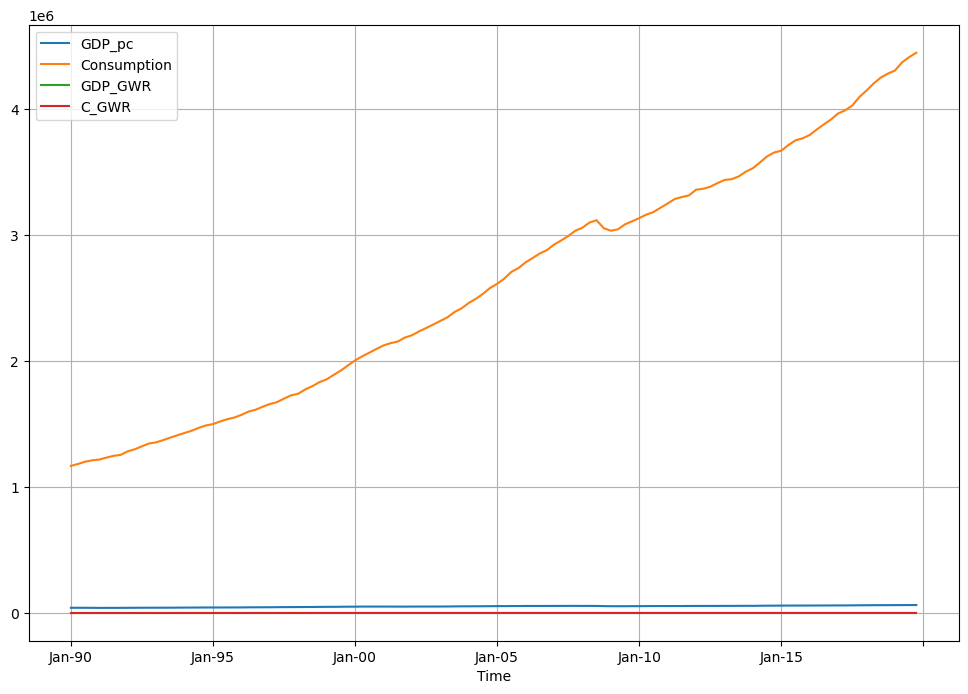

In [ ]:
df1.plot(figsize=(12,8),grid=True)

### for multivariate time series

<Axes: xlabel='Time_Stamp'>

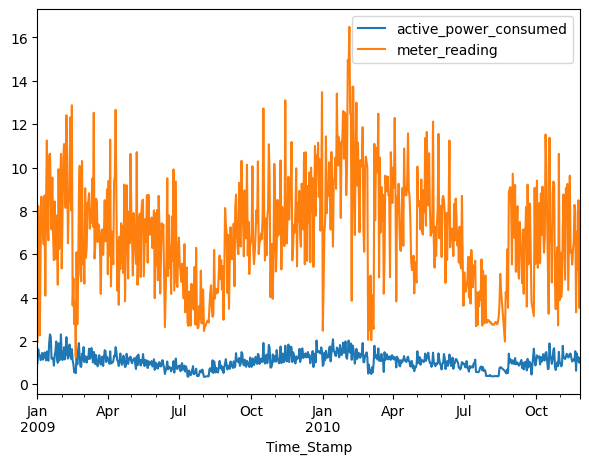

In [ ]:
df4.plot(figsize=(7,5))


In [ ]:
df4.describe()

,active_power_consumed,meter_reading
count,695.000000,695.000000
mean,1.067927,6.956679
std,0.353086,2.550039
min,0.340086,1.247222
25%,0.836134,5.176736
50%,1.054642,6.907639
75%,1.275358,8.677778
max,2.304042,16.488194


# Handling missing values

No missing data is allowed in time series as data is ordered.
It is simply not possible to shift the series to fill in the gaps.

In [ ]:
df4=pd.read_csv('Shoe Sales.csv',parse_dates = ['Month'], index_col = 'Month')

In [ ]:
df4.head()

,No. of Pairs
Month,
2011-01-01,742
2011-02-01,741
2011-03-01,896
2011-04-01,951
2011-05-01,1030


Let us replace the number of pairs for 2012-May which is 932 as np.NaN.

In [ ]:
df4.replace(932, np.NaN, inplace = True)

In [ ]:
df4.isnull().sum()

No. of Pairs    1
dtype: int64

<Axes: xlabel='Month'>

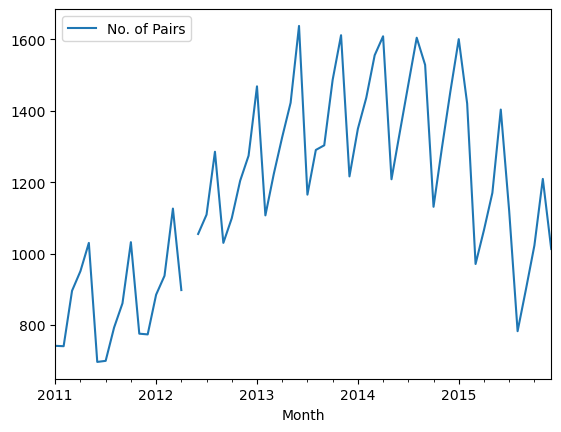

In [ ]:
df4.plot()

In [ ]:
df4.describe()

,No. of Pairs
count,59.000000
mean,1166.271186
std,266.981520
min,697.000000
25%,961.000000
50%,1165.000000
75%,1376.000000
max,1637.000000


#### Time series has one missing value

#### NA value can be replaced using resampling.

In [ ]:
## imputing using rolling mean
daily = df4.fillna(df4.rolling(6,min_periods=1).mean())


## imputing using interpolation
df4_imputed= df4.interpolate(method = 'linear')

In [ ]:
df4_imputed.loc['2012-05-01']

No. of Pairs    976.5
Name: 2012-05-01 00:00:00, dtype: float64

number of pairs for 2012-May which was 932 is now replaced by value 976.5

In [ ]:
daily.loc['2012-05-01']

No. of Pairs    924.2
Name: 2012-05-01 00:00:00, dtype: float64

In [ ]:
df4_imputed.isnull().sum()

No. of Pairs    0
dtype: int64

In [ ]:
daily.isnull().sum()

No. of Pairs    0
dtype: int64

# Modifying time series range

### Let's change the monthly series to quarterly.

In [ ]:
df1_q = df4.resample('Q').sum()

In [ ]:
df1_q.head()

,No. of Pairs
Month,
2011-03-31,2379.0
2011-06-30,2678.0
2011-09-30,2354.0
2011-12-31,2582.0
2012-03-31,2949.0


<Axes: xlabel='Month'>

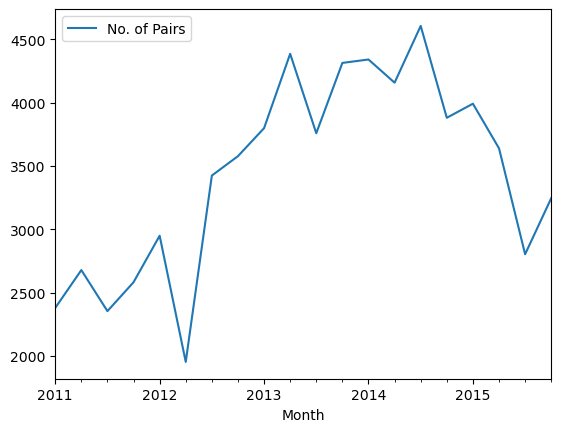

In [ ]:
df1_q.plot()

In [ ]:
df1_q.describe()

,No. of Pairs
count,20.00000
mean,3440.50000
std,782.69262
min,1953.00000
25%,2771.75000
50%,3608.00000
75%,4032.50000
max,4605.00000


# Decomposition of time series

### Air Passanger data

In [ ]:
df1=pd.read_csv('AirPassengers.csv')##,parse_dates = ['Month'], index_col = 'Month')

df1.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

# Step 1: Read the time series data into a DataFrame
df = pd.read_csv('AirPassengers.csv')  # Replace 'time_series_data.csv' with the actual filename

# Step 2: Perform Additive Decomposition
result_additive = seasonal_decompose(df['#Passengers'], model='additive', period=1)

# Step 3: Perform Multiplicative Decomposition
result_multiplicative = seasonal_decompose(df['#Passengers'], model='multiplicative', period=1)

# Step 4: Perform STL Decomposition
stl_result = STL(df['#Passengers'], seasonal=0).fit()

# Step 5: Plot the decomposition results
plt.figure(figsize=(12, 8))

# Additive Decomposition Plot
plt.subplot(3, 1, 1)
plt.plot(result_additive.observed, label='Observed', color='black')
plt.plot(result_additive.trend, label='Trend', color='blue')
plt.plot(result_additive.seasonal, label='Seasonal', color='red')
plt.plot(result_additive.resid, label='Residual', color='green')
plt.title('Additive Decomposition')
plt.legend()

# Multiplicative Decomposition Plot
plt.subplot(3, 1, 2)
plt.plot(result_multiplicative.observed, label='Observed', color='black')
plt.plot(result_multiplicative.trend, label='Trend', color='blue')
plt.plot(result_multiplicative.seasonal, label='Seasonal', color='red')
plt.plot(result_multiplicative.resid, label='Residual', color='green')
plt.title('Multiplicative Decomposition')
plt.legend()

# STL Decomposition Plot
plt.subplot(3, 1, 3)
plt.plot(stl_result.observed, label='Observed', color='black')
plt.plot(stl_result.trend, label='Trend', color='blue')
plt.plot(stl_result.seasonal, label='Seasonal', color='red')
plt.plot(stl_result.resid, label='Residual', color='green')
plt.title('STL Decomposition')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: Unable to determine period from endog

In [ ]:

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
yearly_sales_across_years = pd.pivot_table(df1, values = 'x', columns = df1.index.year,index = df1.index.month_name())
yearly_sales_across_years = yearly_sales_across_years.reindex(index = months)
yearly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

AttributeError: 'RangeIndex' object has no attribute 'year'

In [ ]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


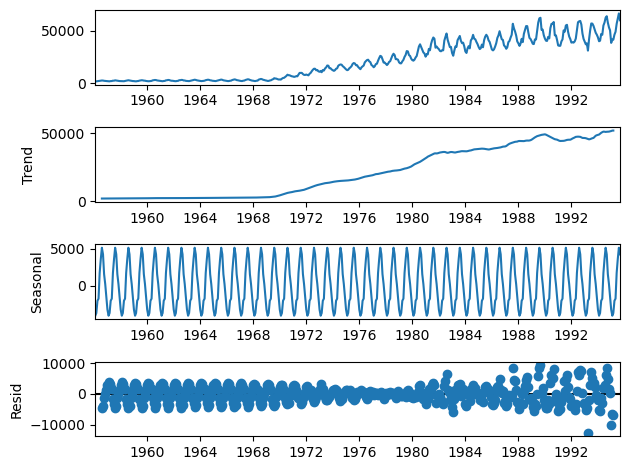

In [ ]:
decomposition = seasonal_decompose(df2,model='additive')
decomposition.plot();

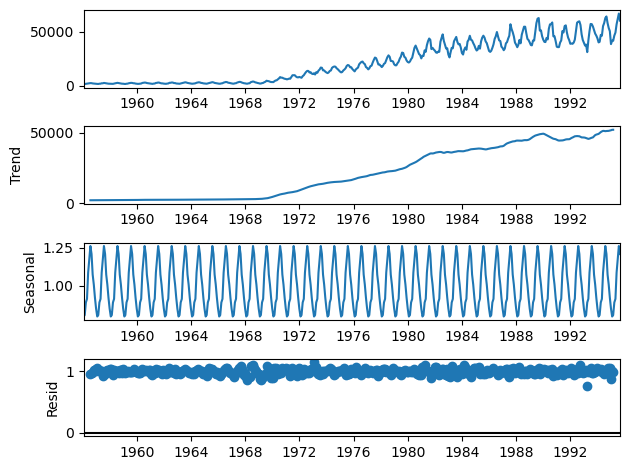

In [ ]:
decomposition = seasonal_decompose(df2,model='multiplicative')
decomposition.plot();

### Decomposition by LOESS

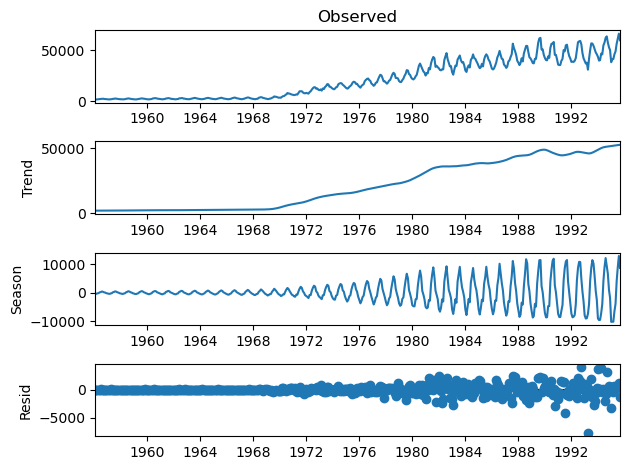

In [ ]:
decomposition = STL(df2).fit()
decomposition.plot();

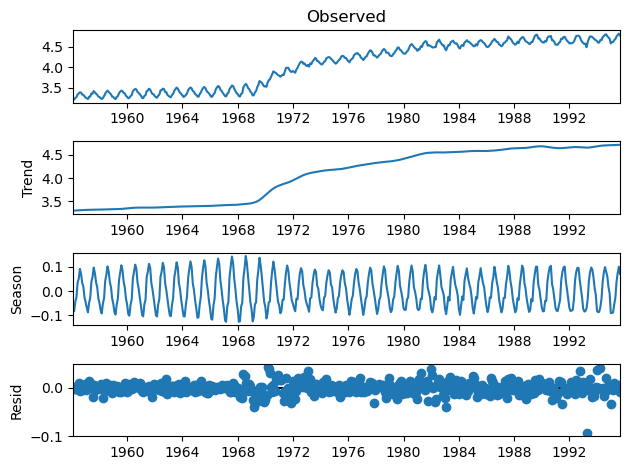

In [ ]:
decomposition = STL(np.log10(df2)).fit()
decomposition.plot();

## Moving Average

In [ ]:
df5=pd.read_csv('Stock.csv', parse_dates = ['TimeStamp'], index_col = 'TimeStamp',dayfirst=True)

In [ ]:
df5

,Close
TimeStamp,
2017-05-01,64.57
2017-05-02,63.78
2017-05-03,62.20
2017-05-04,59.09
2017-05-05,61.67
...,...
2019-01-02,59.41
2019-01-03,59.28
2019-01-04,59.49


In [ ]:
len(df5)

442

<Axes: xlabel='TimeStamp'>

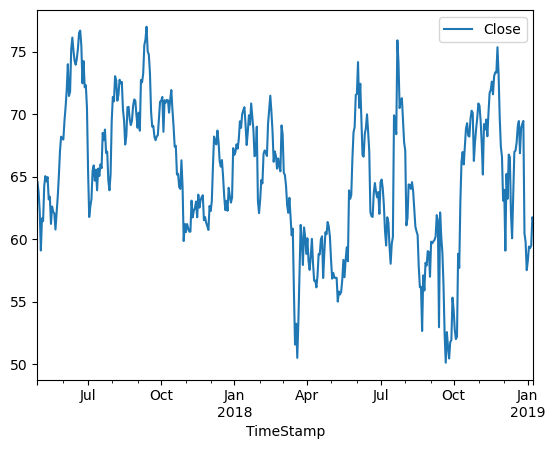

In [ ]:
df5.plot()

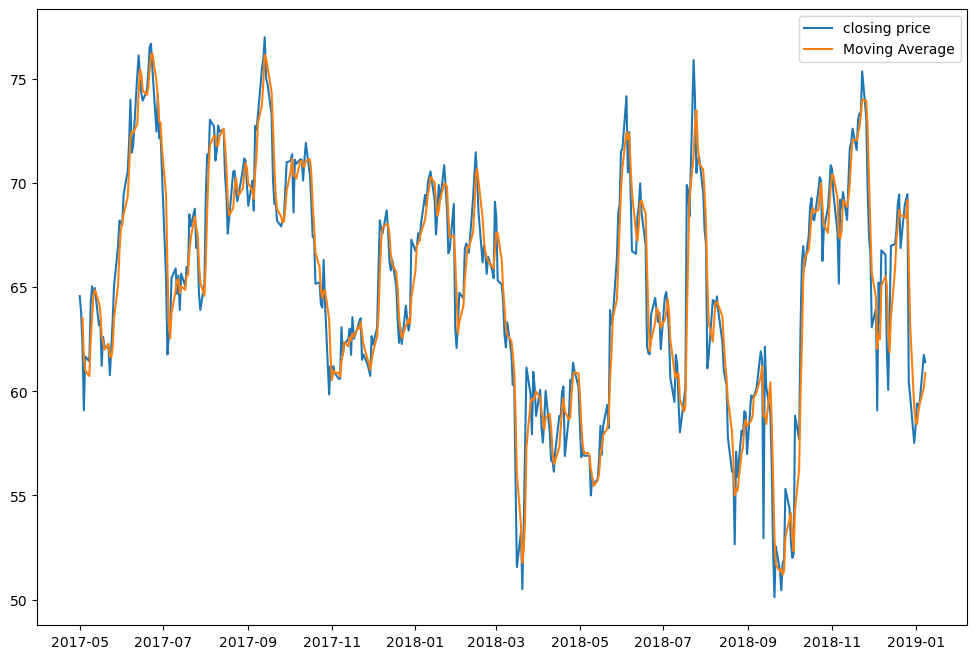

(442, 1)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df5, label='closing price')
plt.plot(df5.rolling(3).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()
df5.shape

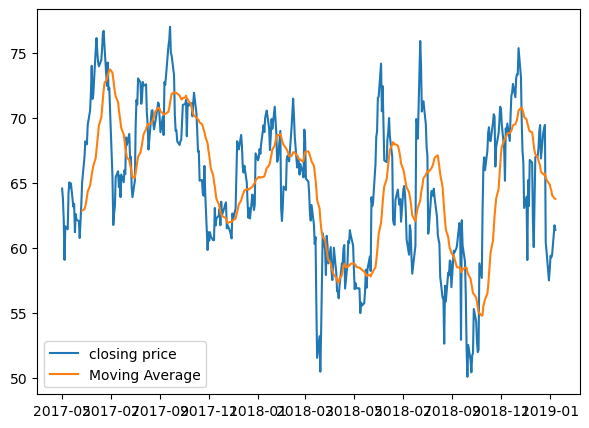

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(df5, label='closing price')
plt.plot(df5.rolling(20).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()

In [ ]:
df1.shape

(144, 2)

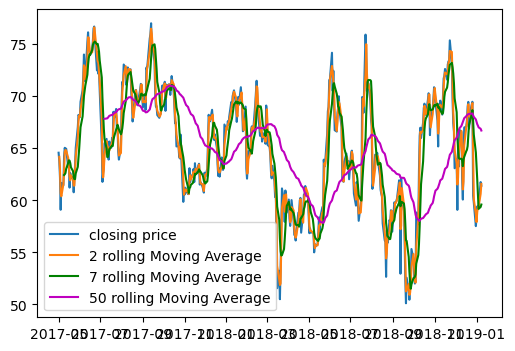

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(df5, label='closing price')
plt.plot(df5.rolling(2).mean(), label='2 rolling Moving Average')
plt.plot(df5.rolling(7).mean(), '-g',label='7 rolling Moving Average')
plt.plot(df5.rolling(50).mean(), '-m',label='50 rolling Moving Average')
plt.legend(loc='best')
plt.show()